In [1]:
import sys
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, Conv2D, MaxPool2D
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
import time

In [2]:
start = time.time()

DEV = False
argvs = sys.argv
argc = len(argvs)

if argc > 1 and (argvs[1] == "--development" or argvs[1] == "-d"):
  DEV = True

if DEV:
  epochs = 2
else:
  epochs = 20

train_data_path = 'dataset/train'
validation_data_path = 'dataset/validation'

In [3]:
"""
Parameters
"""
img_width, img_height = 256, 256
batch_size = 16
samples_per_epoch = 1000
validation_steps = 300
nb_filters1 = 32
nb_filters2 = 32
nb_filters3 = 16
nb_filters4 = 16
nb_filters5 = 16
conv1_size = 9
conv2_size = 7
conv3_size = 5
conv4_size = 5
conv5_size = 5
pool_size = 2
classes_num = 5
lr = 0.001

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(filters=nb_filters1, kernel_size=(conv1_size,conv1_size), kernel_initializer='he_normal', input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=nb_filters2, kernel_size=(conv2_size,conv2_size), kernel_initializer='he_normal', activation='relu'))
model.add(MaxPool2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=nb_filters3, kernel_size=(conv3_size,conv3_size), kernel_initializer='he_normal', activation='relu'))
model.add(MaxPool2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=nb_filters4, kernel_size=(conv4_size,conv4_size), kernel_initializer='he_normal', activation='relu'))
model.add(MaxPool2D(pool_size=(pool_size, pool_size)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=nb_filters5, kernel_size=(conv5_size,conv5_size), kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.2))

In [12]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(classes_num, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 248, 248, 32)      7808      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 118, 118, 32)      50208     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 55, 55, 16)       

In [14]:
print("\n*** Weights Shape ***	\n")
for i, layer in enumerate(model.layers):
    if len(layer.get_weights()) > 0:
       W, b = layer.get_weights()
       print("Layer", i, "\t", layer.name, "\t\t", W.shape, "\t", b.shape)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=lr),
              metrics=['accuracy', tf.keras.metrics.Recall()])

train_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

early_stop = EarlyStopping(monitor='val_loss',patience=2)

# """
# Tensorboard log
# """
# log_dir = './tf-log/'
# tb_cb = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=0)
# cbks = [tb_cb]

model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stop],
    validation_steps=validation_steps)

target_dir = './models/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('./models/model.h5')
model.save_weights('./models/weights.h5')

#Calculate execution time
end = time.time()
dur = end-start

if dur<60:
    print("Execution Time:",dur,"seconds")
elif dur>60 and dur<3600:
    dur=dur/60
    print("Execution Time:",dur,"minutes")
else:
    dur=dur/(60*60)
    print("Execution Time:",dur,"hours")


*** Weights Shape ***	

Layer 0 	 conv2d_7 		 (9, 9, 3, 32) 	 (32,)
Layer 3 	 conv2d_8 		 (7, 7, 32, 32) 	 (32,)
Layer 6 	 conv2d_9 		 (5, 5, 32, 16) 	 (16,)
Layer 9 	 conv2d_10 		 (5, 5, 16, 16) 	 (16,)
Layer 12 	 conv2d_11 		 (5, 5, 16, 16) 	 (16,)
Layer 15 	 dense_3 		 (784, 256) 	 (256,)
Layer 17 	 dense_4 		 (256, 256) 	 (256,)
Layer 19 	 dense_5 		 (256, 5) 	 (5,)
Found 200000 images belonging to 5 classes.
Found 50000 images belonging to 5 classes.
Epoch 1/20
12500/12500 [==============================] - 887s 71ms/step - loss: 0.0703 - accuracy: 0.9798 - recall: 0.9771 - val_loss: 0.0310 - val_accuracy: 0.9900 - val_recall: 0.9862
Epoch 2/20
12500/12500 [==============================] - 902s 72ms/step - loss: 0.0636 - accuracy: 0.9825 - recall: 0.9799 - val_loss: 0.0457 - val_accuracy: 0.9865 - val_recall: 0.9781
Epoch 3/20
12500/12500 [==============================] - 913s 73ms/step - loss: 0.0652 - accuracy: 0.9827 - recall: 0.9803 - val_loss: 0.0316 - val_accuracy: 0.9900

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [3]:
print(tf.__version__)

2.0.0


In [19]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
losses = pd.DataFrame(model.history.history)

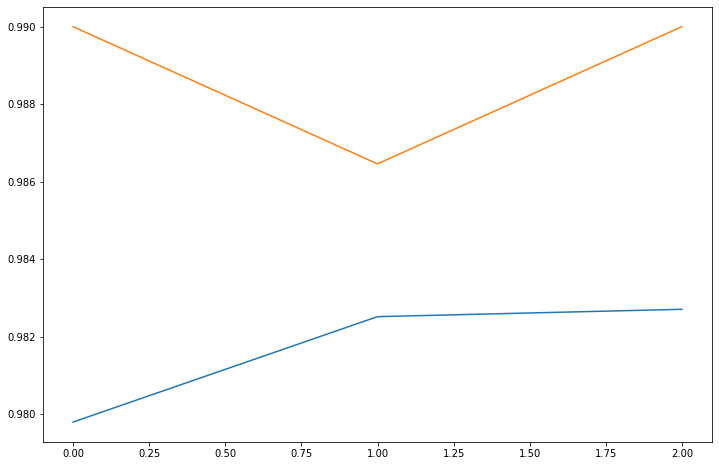

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(losses[['accuracy','val_accuracy']])

In [21]:
losses

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.070314,0.979795,0.97712,0.031000,0.990000,0.986250
1,0.063552,0.982515,0.97986,0.045676,0.986458,0.978125
2,0.065238,0.982705,0.98031,0.031560,0.990000,0.985000


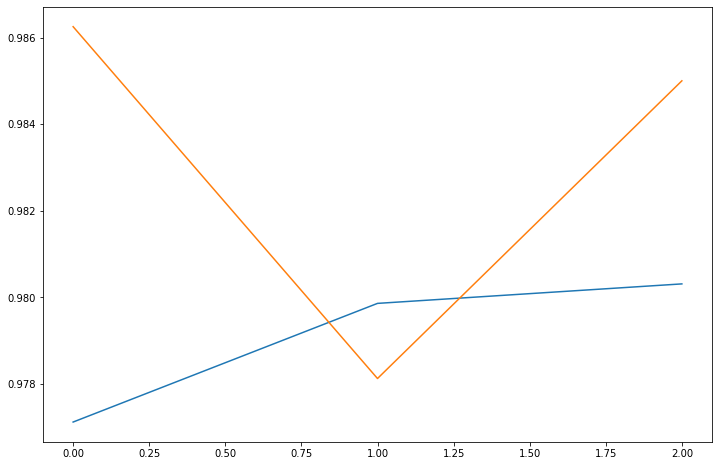

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(losses[['recall', 'val_recall']])